In [1]:
import matplotlib.pyplot as plt
import os
import networkx as nx
import pandas as pd
import csv

In [4]:
os.chdir('./facebook_large/')

In [5]:
def read_csv(csv_path, label_path):
    edges = pd.read_csv(csv_path)
    label = pd.read_csv(label_path)
    edges = edges.rename(columns={"id_1": "source", "id_2": "target"})
    Graphtype = nx.Graph()
    graph = nx.from_pandas_edgelist(edges, create_using=Graphtype)
    for i, node in enumerate(graph.nodes()):
        graph.nodes[node]['page_name'] = label[label['id'] == node]['page_name'][node]
        graph.nodes[node]['page_type'] = label[label['id'] == node]['page_type'][node]
    return graph

In [8]:
def plot_hist(data, xlabel, ylabel, title, x_range = None, bins = 100):
    plt.figure()
    plt.hist(data.values(), bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if x_range:
        plt.xlim(x_range)
    plt.show()

In [6]:
csv_path = "./musae_facebook_edges.csv"
label_path = "./musae_facebook_target.csv"
Facebook = read_csv(csv_path, label_path)

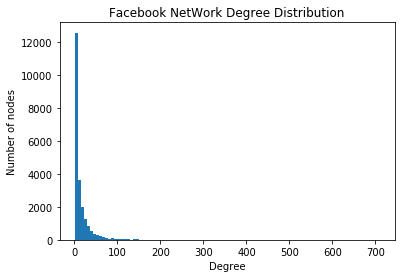

In [9]:
g1_degree = dict(nx.degree(Facebook))
plot_hist(g1_degree, 'Degree', 'Number of nodes', 'Facebook NetWork Degree Distribution')

In [10]:
%%time
g1_diameter = nx.diameter(Facebook)
print("Network diameter: ", g1_diameter)
g1_aspl = nx.average_shortest_path_length(Facebook)
print("Average Shortest Path Length: ", g1_aspl)

Network diameter:  15
Average Shortest Path Length:  4.973703570580348
Wall time: 2h 25min 1s


In [11]:
%store g1_diameter > diameter.txt
%store g1_aspl > aspl.txt

Writing 'g1_diameter' (int) to file 'diameter.txt'.
Writing 'g1_aspl' (float) to file 'aspl.txt'.


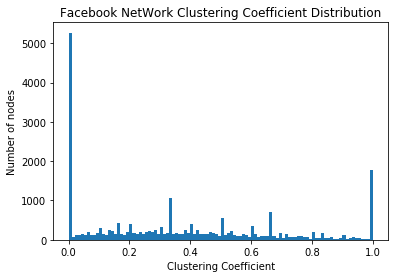

Wall time: 3.53 s


In [12]:
%%time
g1_cc = nx.clustering(Facebook)
plot_hist(g1_cc, 'Clustering Coefficient', 'Number of nodes', 'Facebook NetWork Clustering Coefficient Distribution')

In [13]:
%store g1_cc > cluster_coeff.json

Writing 'g1_cc' (dict) to file 'cluster_coeff.json'.


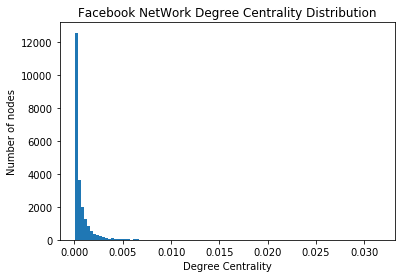

Wall time: 213 ms


In [14]:
%%time
g1_dc = nx.degree_centrality(Facebook)
plot_hist(g1_dc, 'Degree Centrality', 'Number of nodes', 'Facebook NetWork Degree Centrality Distribution')

In [15]:
%store g1_dc > degree_centrality.json

Writing 'g1_dc' (dict) to file 'degree_centrality.json'.


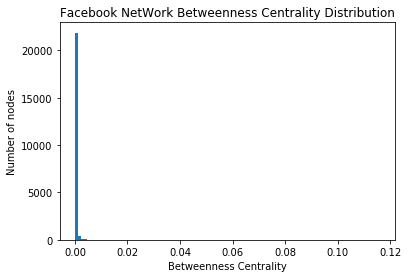

Wall time: 1h 51min 1s


In [16]:
%%time
g1_bc = nx.betweenness_centrality(Facebook)
plot_hist(g1_bc, 'Betweenness Centrality', 'Number of nodes', 'Facebook NetWork Betweenness Centrality Distribution')

In [17]:
%store g1_bc > betweenness_centrality.json

Writing 'g1_bc' (dict) to file 'betweenness_centrality.json'.


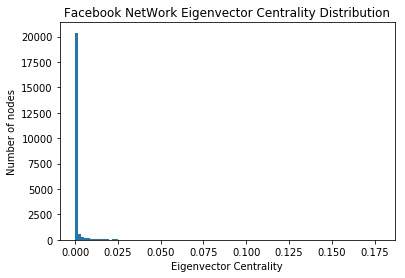

Wall time: 15.5 s


In [18]:
%%time
g1_ec = nx.eigenvector_centrality(Facebook)
plot_hist(g1_ec, 'Eigenvector Centrality', 'Number of nodes', 'Facebook NetWork Eigenvector Centrality Distribution')

In [19]:
%store g1_ec > eigenvector_centrality.json

Writing 'g1_ec' (dict) to file 'eigenvector_centrality.json'.


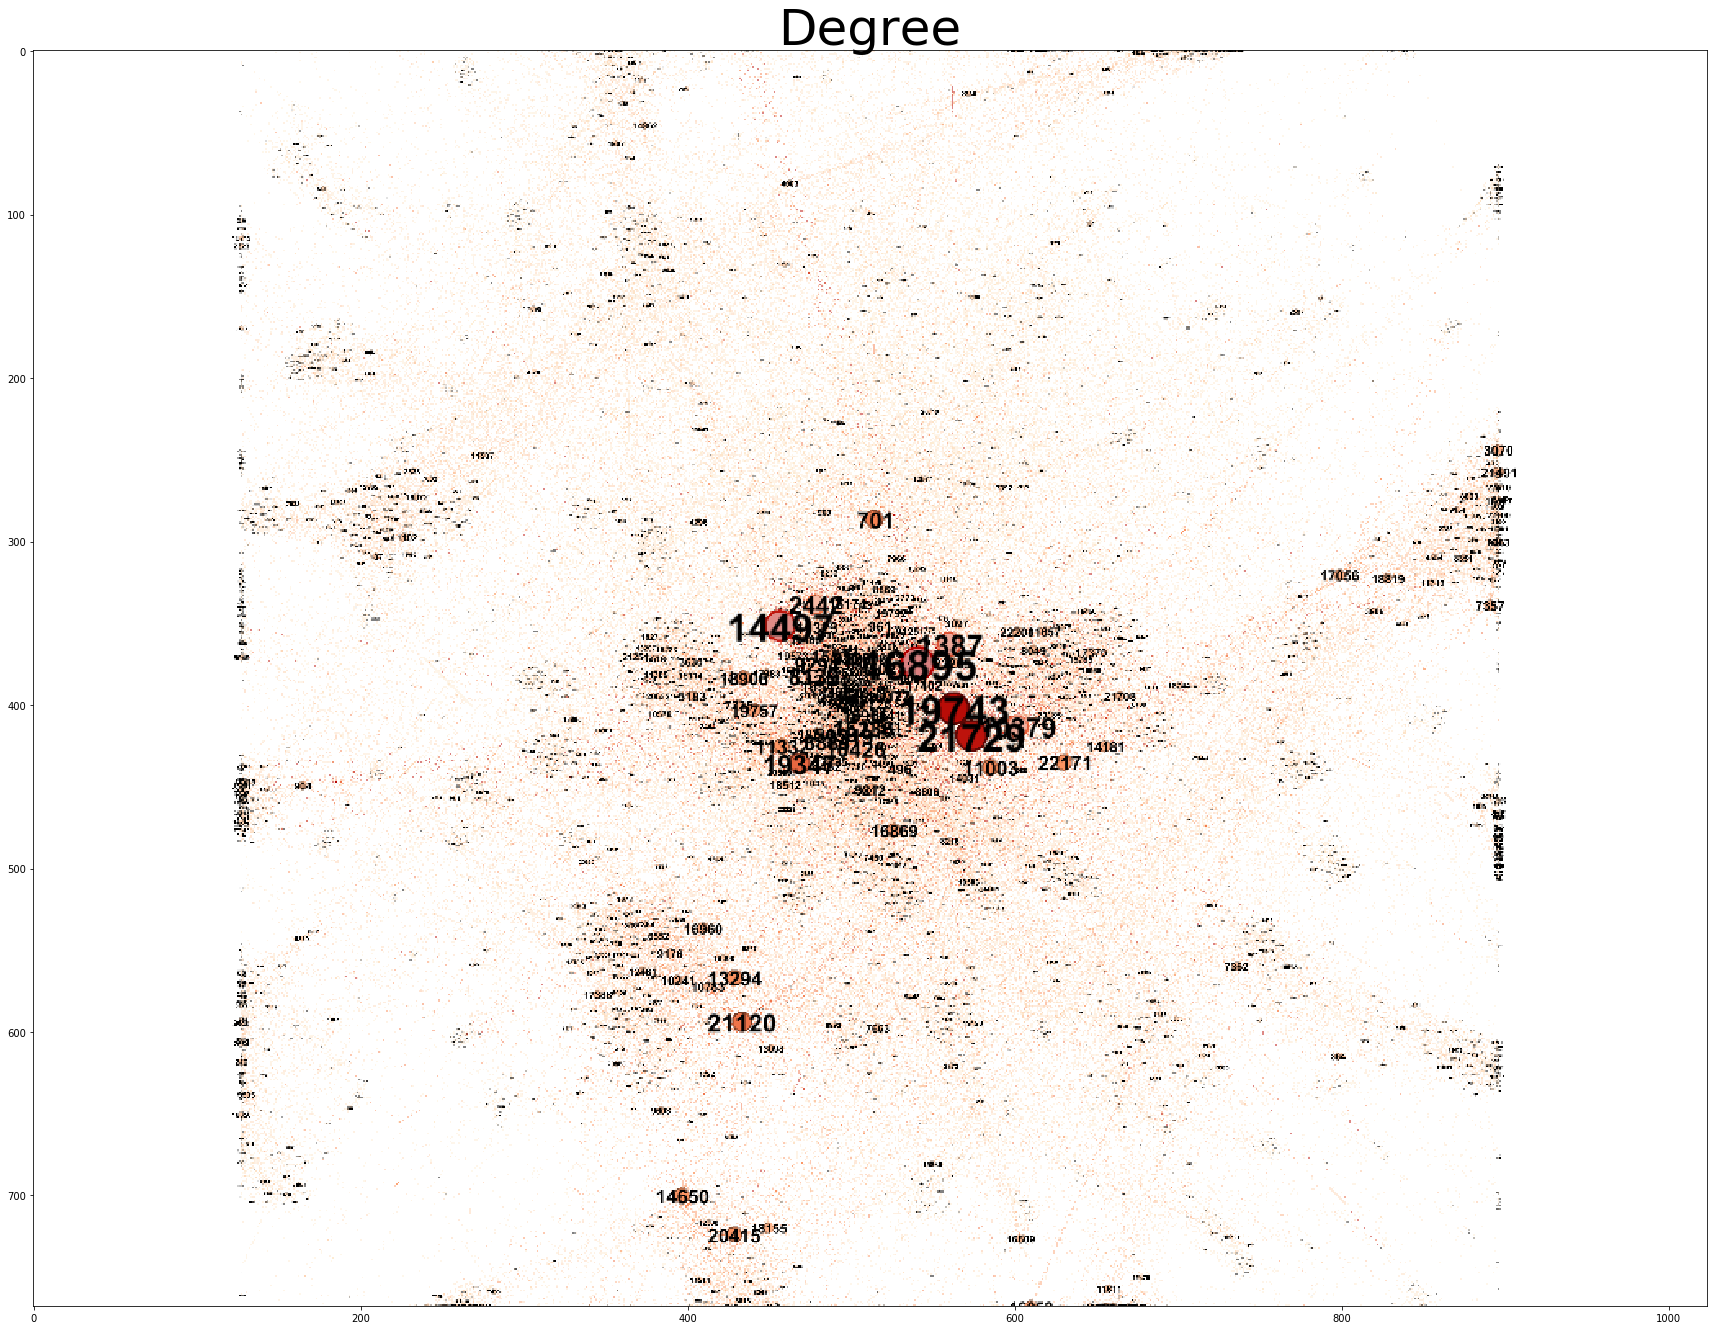

In [25]:
plt.figure(figsize=(30,30))
image = plt.imread('../degree.png')
plt.title('Degree', fontsize=50)
plt.imshow(image)

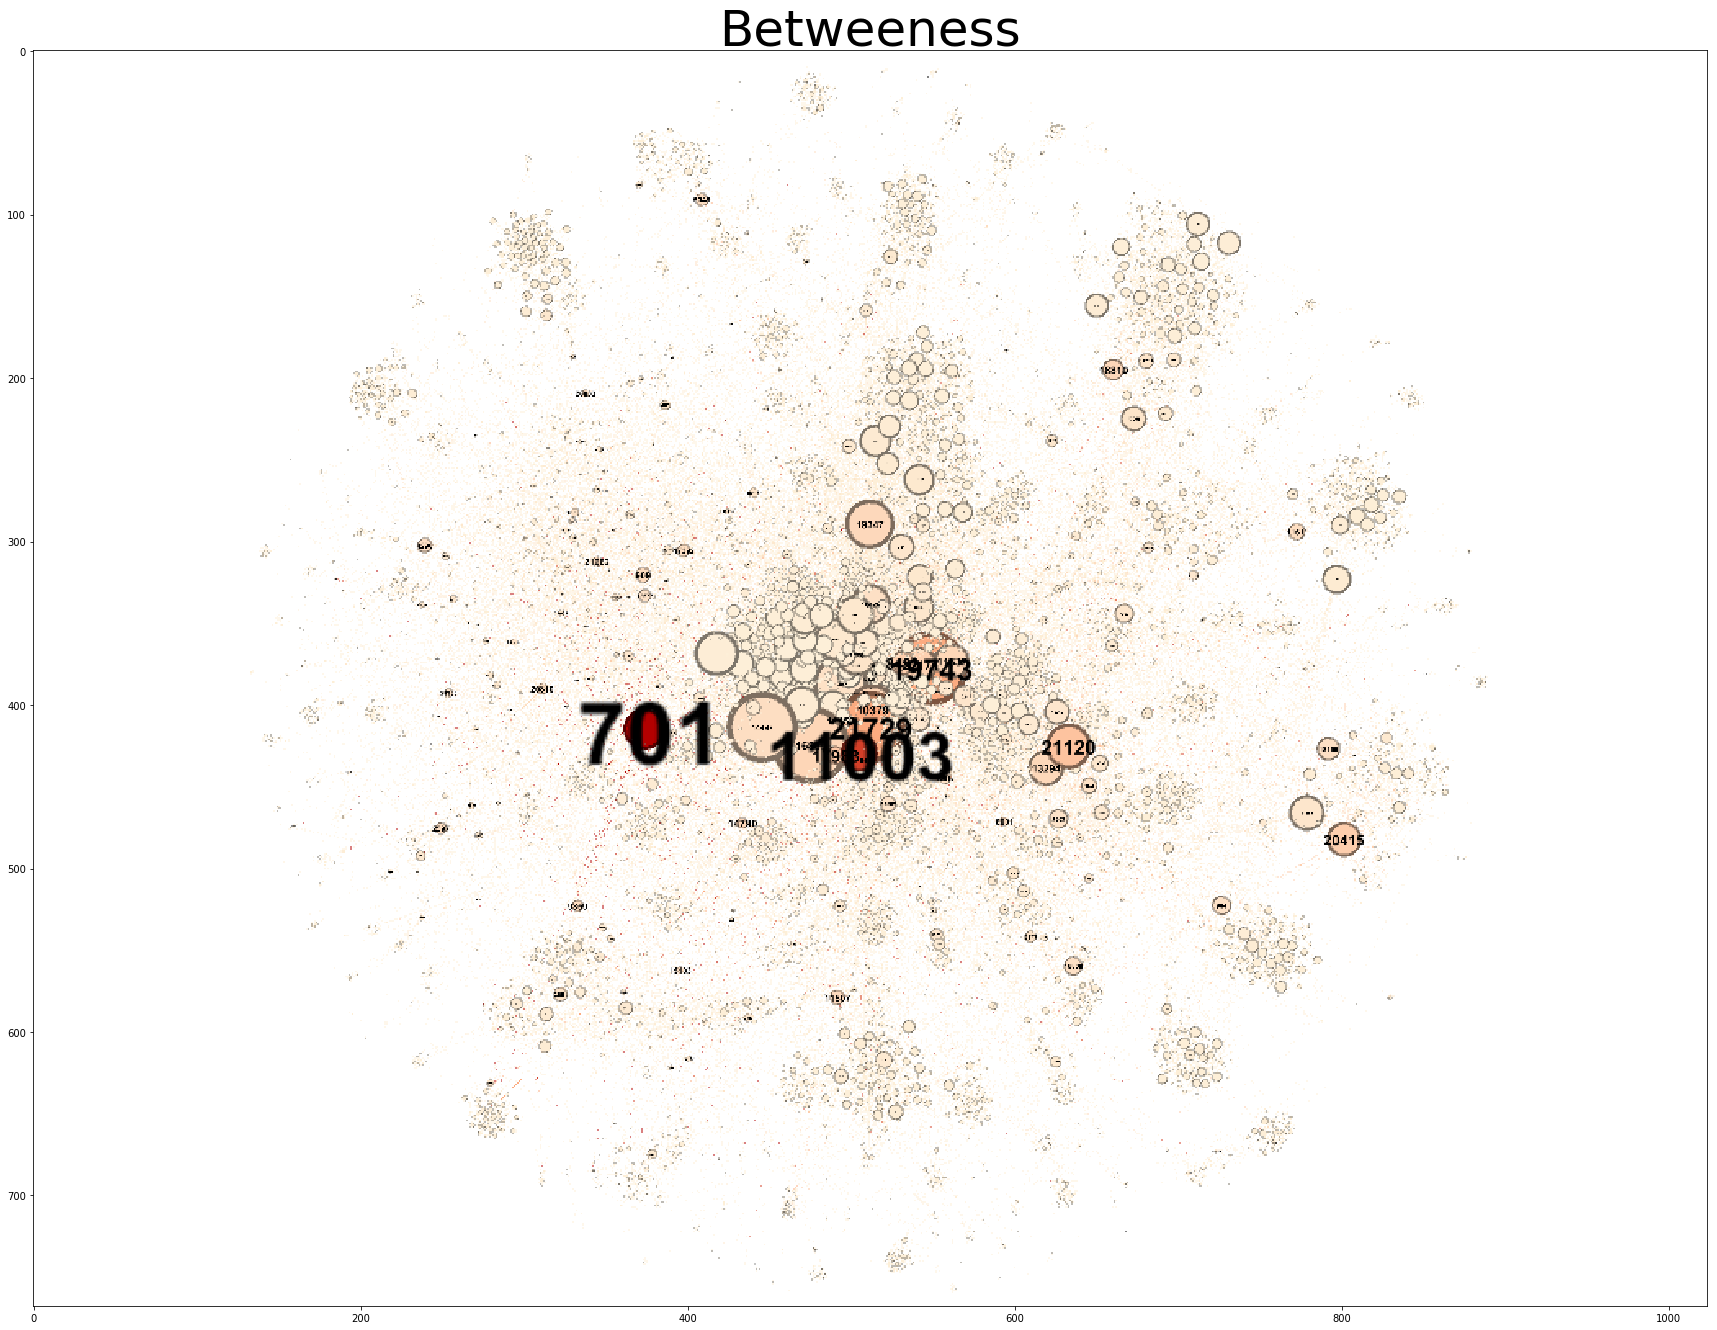

In [27]:
plt.figure(figsize=(30,30))
image = plt.imread('../between.png')
plt.title('Betweeness', fontsize=50)
plt.imshow(image)